# WFD Project Analysis 

**by Donald Ebube**

In [3]:
import pandas as pd
import numpy as np

In [4]:
#Upload 1st dataset
wfd = pd.read_excel("C:/Users/USER/Videos/Data Analytics/Women First Digital Assessment/Spreadsheets_Technical assignment_Data Anlayst 23/counselling_referral_data.xlsx")

In [5]:
#Upload other datasets
gadr_acquisition = pd.read_excel("C:/Users/USER/Videos/Data Analytics/Women First Digital Assessment/Spreadsheets_Technical assignment_Data Anlayst 23/Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name= 'Acquisition')
gadr_age = pd.read_excel("C:/Users/USER/Videos/Data Analytics/Women First Digital Assessment/Spreadsheets_Technical assignment_Data Anlayst 23/Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name= 'Age')
gadr_gender = pd.read_excel("C:/Users/USER/Videos/Data Analytics/Women First Digital Assessment/Spreadsheets_Technical assignment_Data Anlayst 23/Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name= 'Gender')
gadr_page_visits = pd.read_excel("C:/Users/USER/Videos/Data Analytics/Women First Digital Assessment/Spreadsheets_Technical assignment_Data Anlayst 23/Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name= 'Page visits')
gadr_geography = pd.read_excel("C:/Users/USER/Videos/Data Analytics/Women First Digital Assessment/Spreadsheets_Technical assignment_Data Anlayst 23/Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name= 'Geography')
gadr_users = pd.read_excel("C:/Users/USER/Videos/Data Analytics/Women First Digital Assessment/Spreadsheets_Technical assignment_Data Anlayst 23/Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name= 'Users - Sep-Dec 22')

## Ask Phase:


In the course of this analysis, we will be looking for the answers to the following question:

- What is the age, gender, and location distribution of patients seeking services?

- What are the most common services being sought and which services are in high demand?

- What is the referral source for patients and which sources are most effective in driving new patients to the company?


## Prepare Phase:


Women First Digital provided the datasets utilized to generate insights for this technical assessment. During the analysis of this project, the dataset will be investigated, sourced, and delivered for analysis

**Guideline Questions:**
- **Where were the datasets gotten from?** The dataset was gotten directlyfrom Women First Digital

- **How are the datasets arranged and organized?** There are 7 individual datasets present and they are all in excel format.

- **Are there issues with bias or credibility in this data?** No, there is no issue with bias or credibility of these datasets. It was gotten directly from the source (Women First Digital).

- **How did you verify the data’s integrity?** For this dataset, I ensured to check the dataset for accuracy, completeness, consistency, and trustworthiness of the data throughout its lifecycle and by doing this, it shows that the dataset has consistent columns, and each column has the essential type of data required.

### Inspection of Datasets

In [6]:
wfd

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,...,D&E,Induction,PAC,Referral,Ability to pay for referral services/products,Reason for not referring,Reason for referral,ref-Subreason 1,Referred to on-the-ground org,Referred to direct provider
0,92854,Waiting on User,Email,Julia L,Spanish,2022-09-01 00:01:23,September,2022-09-01 16:32:04,00:00:00,1,...,False,False,False,No,NaN,Suspected Pregnancy,NaN,NaN,False,False
1,92855,Evaluation sent,Chat,No Agent,Spanish,2022-09-01 00:05:46,September,2022-09-27 18:12:41,00:00:00,0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False
2,92856,Evaluation sent,Email,No Agent,Spanish,2022-09-01 00:10:48,September,2022-09-27 18:12:41,00:00:00,0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False
3,101202,Waiting on KQ - reminder,Chat,Lucy P,Spanish,2022-09-23 18:20:24,September,2022-09-30 20:23:28,00:00:00,1,...,False,False,False,No,NaN,Dropped,NaN,NaN,False,False
4,101407,Waiting on KQ,Chat,No Agent,No Group,2022-09-24 12:16:03,September,2022-09-24 12:16:03,00:00:00,0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,137318,Waiting on KQ,Email,No Agent,English,2022-12-31 21:34:30,December,2022-12-31 21:34:30,00:00:00,0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False
2332,137319,Waiting on KQ,Email,No Agent,Portuguese,2022-12-31 21:38:34,December,2022-12-31 21:38:35,00:00:00,0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False
2333,137320,Closed,Chat,Hellena Brinas,English,2022-12-31 21:44:31,December,2023-01-03 07:02:51,16:02:51,0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False
2334,137321,Waiting on KQ,Chat,No Agent,Spanish,2022-12-31 22:47:44,December,2022-12-31 22:47:45,00:00:00,0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False


In [7]:
wfd.shape

(2336, 45)

In [8]:
gadr_acquisition


,Default Channel Grouping,Users,New Users,Sessions,Bounce Rate,Pages/Session,Avg. Session Duration
0,Organic Search,908831,835236,1168784,0.138337,2.787992,95.430919
1,Paid Search,208793,195714,306754,0.774842,1.362307,23.712111
2,Direct,196238,194134,230303,0.169594,2.999462,101.461001
3,Referral,12982,11125,16405,0.128436,4.324169,164.829930
4,Social,7645,6875,8915,0.131015,5.106786,151.808301
5,(Other),3,2,5,0.400000,2.400000,166.200000
6,Email,1,1,2,0.000000,2.000000,40.000000
7,NaN,1334493,1243087,1731168,0.255150,2.589996,84.473030


In [9]:
gadr_acquisition.shape

(8, 7)

In [10]:
gadr_age


,Age,Users
0,18-24,148670
1,25-34,133562
2,35-44,67560
3,45-54,41398
4,55-64,25973
5,65+,16096
6,NaN,433259


In [11]:
gadr_age.shape

(7, 2)

In [12]:
gadr_gender


,Gender,Users
0,female,271582
1,male,237350
2,NaN,508932


In [13]:
gadr_gender.shape

(3, 2)

In [14]:
gadr_geography


,Country,Users,New Users,Sessions,Bounce Rate,Pages/Session,Avg. Session Duration
0,India,172126,173438,213566,0.119153,2.472627,73.011327
1,Brazil,106594,105322,142237,0.120834,3.263483,114.385638
2,Philippines,99889,97929,128124,0.136766,2.729372,114.057764
3,Mexico,90855,89773,124194,0.257484,2.698222,76.659275
4,Liberia,60141,59960,60819,0.277791,2.437741,44.913547
5,Kenya,57182,55438,106229,0.548494,1.975223,53.841380
6,United States,53235,53128,63739,0.163981,3.034312,68.057500
7,Ghana,39207,38807,63474,0.548965,2.080710,57.330923
8,Colombia,39142,39220,53816,0.284841,2.409897,68.655103
9,Nigeria,37293,36945,49188,0.138225,3.024986,118.693828


In [15]:
gadr_geography.shape

(11, 7)

In [16]:
gadr_page_visits


,Page,Page Views,Unique Page Views,Avg. Time on Page,Entrances,Bounce Rate,% Exit
0,/es/safe-abortion/abortion-pills/abortion-with...,213211,104666,68.005218,93371,0.134155,0.439110
1,/,206788,112562,40.616076,85384,0.218065,0.284741
2,/hi/safe-abortion/abortion-pills/types-abortio...,194308,92092,55.053400,86218,0.107318,0.442658
3,/abortion-pill-information,158841,134952,66.963177,132388,0.810458,0.821167
4,/safe-abortion/abortion-pills/using-mifepristo...,141541,70847,78.848416,59482,0.133565,0.424153
5,/es/safe-abortion/abortion-pills/types-abortio...,128003,63550,52.834956,60635,0.135972,0.471364
6,/pt/safe-abortion/abortion-pills/abortion-with...,121122,59049,81.579317,48978,0.115316,0.403304
7,/fr/safe-abortion/abortion-pills/abortion-with...,119307,56786,94.608462,49739,0.131934,0.413806
8,/safe-abortion/abortion-pills/types-abortion-p...,117422,57769,61.724554,53866,0.142690,0.456737
9,/abortion-stories,113428,53746,30.289166,41177,0.270782,0.473834


In [17]:
gadr_page_visits.shape

(11, 7)

In [18]:
gadr_users

,Day Index,Users
0,2022-09-01,8232
1,2022-09-02,8179
2,2022-09-03,7755
3,2022-09-04,7231
4,2022-09-05,8112
...,...,...
118,2022-12-28,14944
119,2022-12-29,14303
120,2022-12-30,12793
121,2022-12-31,9110


In [19]:
gadr_users.shape

(123, 2)

## Process Phase:

This phase will prepare the dataset for analysis by ensuring that it has been properly built, filtered, sorted, and cleaned.

**Guiding Questions:**

- **What tool are you choosing to use for the analysis?** Python (Jupyter Notebook)

- **Have you ensured your data’s integrity?** Yes, I have ensured my data’s integrity.

### Clean Dataset


#### For Counselling Refferal Data

##### Step 1: Delete columns with a large amount of null values

In [20]:
#List of columns with null values
wfd.isna().sum()

Ticket ID                                           0
Status                                              0
Source                                              0
Agent                                               0
Group                                               0
Created time                                        0
Month                                               0
Last update time                                    0
Resolution time (in hrs)                            0
Agent interactions                                  0
Customer interactions                               0
First response status                            1749
Tags                                             1045
Countries (NEW)                                  1763
Region                                           2336
Agent 2                                          2248
Agent 3                                          2325
Language                                          578
City                        

In [21]:
wfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 45 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ticket ID                                      2336 non-null   int64  
 1   Status                                         2336 non-null   object 
 2   Source                                         2336 non-null   object 
 3   Agent                                          2336 non-null   object 
 4   Group                                          2336 non-null   object 
 5   Created time                                   2336 non-null   object 
 6   Month                                          2336 non-null   object 
 7   Last update time                               2336 non-null   object 
 8   Resolution time (in hrs)                       2336 non-null   object 
 9   Agent interactions                             2336 

**List of columns to be deleted due large amount of missing information**

Region, Agent 2, Agent 3, Age,Subreason 1 ,Subreason 2, 2nd reason for contact, 2nd Subreason 1, 3rd reason for contact, 3rd Subreason 1, Kind of Pill, Amount of pill, Ability to pay for referral services/products , ref-Subreason 1, 

In [22]:
# Remove the following columns above

wfd = wfd.drop(
    columns=[
        'Region', 
        "Agent 2", 
        "Age", 
        "Subreason 1", 
        "Subreason 2", 
        "2nd reason for contact", 
        "2nd Subreason 1", 
        "3rd reason for contact", 
        "3rd Subreason 1",
        "Kind of pills",
        "Amount of pills",
        "Ability to pay for referral services/products",
        "ref-Subreason 1",
        "Agent 3",
        "+ days"

    ], axis= 1
)


In [23]:
#Verify that the columns have been removed
#They have been reduced from from 46 to 31
wfd.shape

(2336, 30)

##### Step 2: Replace object data types with "Not Provided" and numerical data type with the mean value or use the interpolation method to remove null vaues

In [24]:
#Get a list of all the columns in the dataset
columns = wfd.columns
print(columns)

Index(['Ticket ID', 'Status', 'Source', 'Agent', 'Group', 'Created time',
       'Month', 'Last update time', 'Resolution time (in hrs)',
       'Agent interactions', 'Customer interactions', 'First response status',
       'Tags', 'Countries (NEW)', 'Language', 'City',
       'Gestational weeks at first contact', 'Main reason for contact',
       'In possession of pills', 'Abortion method counselled on', 'MA',
       'MVA/EVA', 'D&E', 'Induction', 'PAC', 'Referral ',
       'Reason for not referring', 'Reason for referral',
       'Referred to on-the-ground org', 'Referred to direct provider'],
      dtype='object')


In [25]:
# Check each column to know the data type of each column

wfd[
    [
        'First response status', 
        'Tags', 
        'Countries (NEW)', 
        'Language', 
        'City', 
        'Gestational weeks at first contact', 
        'Main reason for contact',
        'In possession of pills',
        'Abortion method counselled on',
        'Referral ',
        'Reason for not referring',
        'Reason for referral',
    ]
].dtypes

First response status                 object
Tags                                  object
Countries (NEW)                       object
Language                              object
City                                  object
Gestational weeks at first contact    object
Main reason for contact               object
In possession of pills                object
Abortion method counselled on         object
Referral                              object
Reason for not referring              object
Reason for referral                   object
dtype: object

In [26]:
#For the columns with object data type, replace with "Not Provided"

wfd = wfd.fillna(
    {
        'First response status': 'Not Provided',
        'Tags': 'Not Provided',
        'Countries (NEW)': 'Not Provided',
        'Language': 'Not Provided',
        'City': 'Not Provided',
        'Gestational weeks at first contact': 'Not Provided',
        'Main reason for contact': 'Not Provided',
        'In possession of pills': 'Not Provided',
        'Abortion method counselled on': 'Not Provided',
        'Referral ': 'Not Provided',
        'Reason for not referring': 'Not Provided',
        'Reason for referral': 'Not Provided',
        }
)



In [27]:
#Verify that the values in the columns have been changed
wfd.head(2)

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,...,MA,MVA/EVA,D&E,Induction,PAC,Referral,Reason for not referring,Reason for referral,Referred to on-the-ground org,Referred to direct provider
0,92854,Waiting on User,Email,Julia L,Spanish,2022-09-01 00:01:23,September,2022-09-01 16:32:04,00:00:00,1,...,False,False,False,False,False,No,Suspected Pregnancy,Not Provided,False,False
1,92855,Evaluation sent,Chat,No Agent,Spanish,2022-09-01 00:05:46,September,2022-09-27 18:12:41,00:00:00,0,...,False,False,False,False,False,Not Provided,Not Provided,Not Provided,False,False


In [28]:
#Verify that all the null values have been removed

wfd.isna().sum()

Ticket ID                             0
Status                                0
Source                                0
Agent                                 0
Group                                 0
Created time                          0
Month                                 0
Last update time                      0
Resolution time (in hrs)              0
Agent interactions                    0
Customer interactions                 0
First response status                 0
Tags                                  0
Countries (NEW)                       0
Language                              0
City                                  0
Gestational weeks at first contact    0
Main reason for contact               0
In possession of pills                0
Abortion method counselled on         0
MA                                    0
MVA/EVA                               0
D&E                                   0
Induction                             0
PAC                                   0


#### For Users

In [29]:
# Drop the last row

gadr_users.drop(index=122, inplace=True)

In [30]:
# Verify
gadr_users

,Day Index,Users
0,2022-09-01,8232
1,2022-09-02,8179
2,2022-09-03,7755
3,2022-09-04,7231
4,2022-09-05,8112
...,...,...
117,2022-12-27,14544
118,2022-12-28,14944
119,2022-12-29,14303
120,2022-12-30,12793


#### For Page Visits

In [31]:
# Drop the last row
gadr_page_visits.drop(index=10, inplace=True)

In [32]:
# Verify
gadr_page_visits

,Page,Page Views,Unique Page Views,Avg. Time on Page,Entrances,Bounce Rate,% Exit
0,/es/safe-abortion/abortion-pills/abortion-with...,213211,104666,68.005218,93371,0.134155,0.439110
1,/,206788,112562,40.616076,85384,0.218065,0.284741
2,/hi/safe-abortion/abortion-pills/types-abortio...,194308,92092,55.053400,86218,0.107318,0.442658
3,/abortion-pill-information,158841,134952,66.963177,132388,0.810458,0.821167
4,/safe-abortion/abortion-pills/using-mifepristo...,141541,70847,78.848416,59482,0.133565,0.424153
5,/es/safe-abortion/abortion-pills/types-abortio...,128003,63550,52.834956,60635,0.135972,0.471364
6,/pt/safe-abortion/abortion-pills/abortion-with...,121122,59049,81.579317,48978,0.115316,0.403304
7,/fr/safe-abortion/abortion-pills/abortion-with...,119307,56786,94.608462,49739,0.131934,0.413806
8,/safe-abortion/abortion-pills/types-abortion-p...,117422,57769,61.724554,53866,0.142690,0.456737
9,/abortion-stories,113428,53746,30.289166,41177,0.270782,0.473834


#### For Geography


In [33]:
gadr_geography


,Country,Users,New Users,Sessions,Bounce Rate,Pages/Session,Avg. Session Duration
0,India,172126,173438,213566,0.119153,2.472627,73.011327
1,Brazil,106594,105322,142237,0.120834,3.263483,114.385638
2,Philippines,99889,97929,128124,0.136766,2.729372,114.057764
3,Mexico,90855,89773,124194,0.257484,2.698222,76.659275
4,Liberia,60141,59960,60819,0.277791,2.437741,44.913547
5,Kenya,57182,55438,106229,0.548494,1.975223,53.841380
6,United States,53235,53128,63739,0.163981,3.034312,68.057500
7,Ghana,39207,38807,63474,0.548965,2.080710,57.330923
8,Colombia,39142,39220,53816,0.284841,2.409897,68.655103
9,Nigeria,37293,36945,49188,0.138225,3.024986,118.693828


In [34]:
# Drop the last row
gadr_geography.drop(index=10, inplace=True)


In [35]:
# Verify if it has been deleted
gadr_geography

,Country,Users,New Users,Sessions,Bounce Rate,Pages/Session,Avg. Session Duration
0,India,172126,173438,213566,0.119153,2.472627,73.011327
1,Brazil,106594,105322,142237,0.120834,3.263483,114.385638
2,Philippines,99889,97929,128124,0.136766,2.729372,114.057764
3,Mexico,90855,89773,124194,0.257484,2.698222,76.659275
4,Liberia,60141,59960,60819,0.277791,2.437741,44.913547
5,Kenya,57182,55438,106229,0.548494,1.975223,53.841380
6,United States,53235,53128,63739,0.163981,3.034312,68.057500
7,Ghana,39207,38807,63474,0.548965,2.080710,57.330923
8,Colombia,39142,39220,53816,0.284841,2.409897,68.655103
9,Nigeria,37293,36945,49188,0.138225,3.024986,118.693828


#### For Gender


In [36]:
gadr_gender


,Gender,Users
0,female,271582
1,male,237350
2,NaN,508932


In [37]:
# Drop the last row
gadr_gender.drop(index=2, inplace=True)

In [38]:
# Verify if it has been removed
gadr_gender

,Gender,Users
0,female,271582
1,male,237350


In [39]:
# Change the female to Female and the male to Male

gadr_gender['Gender'].replace({'female':'Female', 'male':'Male'}, inplace= True)

In [40]:
# Verify if it has been changed
gadr_gender

,Gender,Users
0,Female,271582
1,Male,237350


#### For Age


In [41]:
gadr_age

,Age,Users
0,18-24,148670
1,25-34,133562
2,35-44,67560
3,45-54,41398
4,55-64,25973
5,65+,16096
6,NaN,433259


In [42]:
# Drop the last row
gadr_age.drop(index=6, inplace=True)

In [43]:
#Verify
gadr_age

,Age,Users
0,18-24,148670
1,25-34,133562
2,35-44,67560
3,45-54,41398
4,55-64,25973
5,65+,16096


In [44]:
# Create a new column for Age Groups
gadr_age['Age Group'] = np.where(gadr_age['Age'].isin(['18-24']), 'Young adults',
                        np.where(gadr_age['Age'].isin(['25-34']), 'Adults',
                        np.where(gadr_age['Age'].isin(['35-44']), 'Mid-age adults',
                        np.where(gadr_age['Age'].isin(['45-54']), 'Older adults',
                        np.where(gadr_age['Age'].isin(['55-64']), 'Seniors',
                        'Elders'
                        )
                    )
                )
            )
        )

In [45]:
#Verify
gadr_gender

,Gender,Users
0,Female,271582
1,Male,237350


#### For Acquisition


In [46]:
gadr_acquisition

,Default Channel Grouping,Users,New Users,Sessions,Bounce Rate,Pages/Session,Avg. Session Duration
0,Organic Search,908831,835236,1168784,0.138337,2.787992,95.430919
1,Paid Search,208793,195714,306754,0.774842,1.362307,23.712111
2,Direct,196238,194134,230303,0.169594,2.999462,101.461001
3,Referral,12982,11125,16405,0.128436,4.324169,164.829930
4,Social,7645,6875,8915,0.131015,5.106786,151.808301
5,(Other),3,2,5,0.400000,2.400000,166.200000
6,Email,1,1,2,0.000000,2.000000,40.000000
7,NaN,1334493,1243087,1731168,0.255150,2.589996,84.473030


In [47]:
# Drop the last row
gadr_acquisition.drop(index=7, inplace=True)

In [48]:
# Verify
gadr_acquisition

,Default Channel Grouping,Users,New Users,Sessions,Bounce Rate,Pages/Session,Avg. Session Duration
0,Organic Search,908831,835236,1168784,0.138337,2.787992,95.430919
1,Paid Search,208793,195714,306754,0.774842,1.362307,23.712111
2,Direct,196238,194134,230303,0.169594,2.999462,101.461001
3,Referral,12982,11125,16405,0.128436,4.324169,164.829930
4,Social,7645,6875,8915,0.131015,5.106786,151.808301
5,(Other),3,2,5,0.400000,2.400000,166.200000
6,Email,1,1,2,0.000000,2.000000,40.000000


## Analyse Phase:

At this phase, I was able to utilize the **Decision Tree Algorithm to build a prediction model that can be used to create a whole new dataset.**

In [49]:
# Create a Prediction Model with Decision Trees Algorithm

from sklearn import tree
from sklearn import preprocessing

In [50]:
# Initialize Label Encoder
label_encoder = preprocessing.LabelEncoder()

#Convert  Country variable to numeric
encoded_status = label_encoder.fit_transform(wfd["Status"])

# Initialize  model
tree_model = tree.DecisionTreeClassifier()

#Train the model
tree_model.fit(X = pd.DataFrame(encoded_status),y = wfd["Source"])

DecisionTreeClassifier()

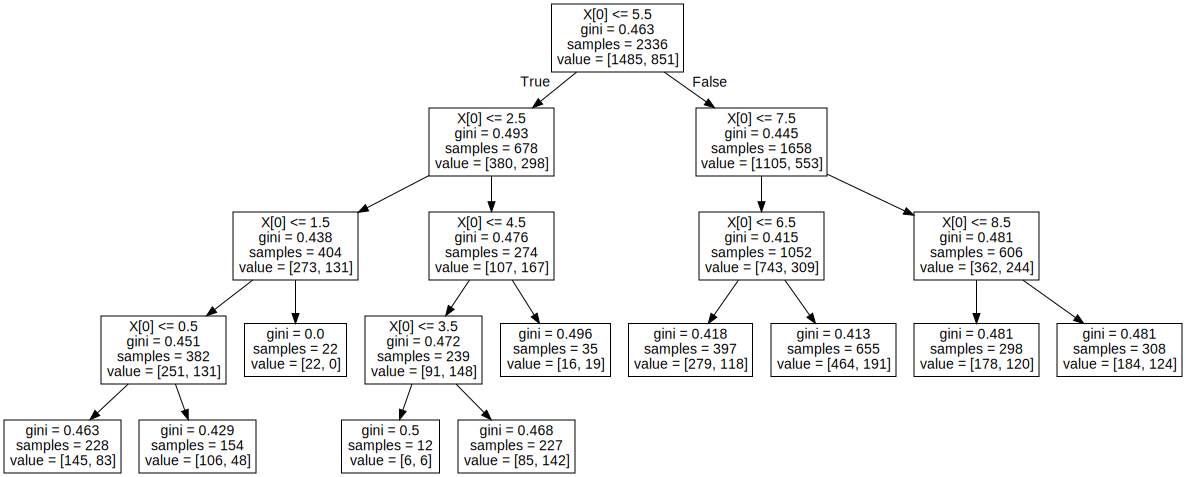

In [51]:
import graphviz

#Save tree as dot file
dot_data = tree.export_graphviz(tree_model, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [52]:
#Get values in Status column

unique_status = wfd["Status"].unique()

print(unique_status)

['Waiting on User' 'Evaluation sent' 'Waiting on KQ - reminder'
 'Waiting on KQ' 'Referral - reminder' 'Referral' 'Resolved' 'Closed'
 'Need to fill properties chat' 'Open']


In [53]:
# Get Source Probability
preds = tree_model.predict_proba(X = pd.DataFrame(encoded_status))

Waiting_on_User = preds[wfd['Status'] == 'Waiting on User'][0][1]
Evaluation_sent = preds[wfd['Status'] == 'Evaluation sent'][0][1]
Waiting_on_KQ_reminder = preds[wfd['Status'] == 'Waiting on KQ - reminder'][0][1]
Waiting_on_KQ = preds[wfd['Status'] == 'Waiting on KQ'][0][1]
Referral_reminder = preds[wfd['Status'] == 'Referral - reminder'][0][1]
Referral = preds[wfd['Status'] == 'Referral'][0][1]
Resolved = preds[wfd['Status'] == 'Resolved'][0][1]
Closed = preds[wfd['Status'] == 'Closed'][0][1]
Need_to_fill_properties_chat = preds[wfd['Status'] == 'Need to fill properties chat'][0][1]
Open = preds[wfd['Status'] == 'Open'][0][1]

print('Waiting on User: ', "{:.2%}".format(Waiting_on_User))
print('Evaluation sent: ', "{:.2%}".format(Evaluation_sent))
print('Waiting on KQ - reminder: ', "{:.2%}".format(Waiting_on_KQ_reminder))
print('Waiting_on_KQ : ', "{:.2%}".format(Waiting_on_KQ))
print('Referral_reminder: ', "{:.2%}".format(Referral_reminder))
print('Referral: ', "{:.2%}".format(Referral))
print('Resolved: ', "{:.2%}".format(Resolved))
print('Closed: ', "{:.2%}".format(Closed))
print('Need_to_fill_properties_chat: ', "{:.2%}".format(Need_to_fill_properties_chat))
print('Open: ', "{:.2%}".format(Open))

Waiting on User:  40.26%
Evaluation sent:  31.17%
Waiting on KQ - reminder:  40.27%
Waiting_on_KQ :  29.16%
Referral_reminder:  54.29%
Referral:  62.56%
Resolved:  29.72%
Closed:  36.40%
Need_to_fill_properties_chat:  0.00%
Open:  50.00%


## Share Phase:

In order for stakeholders to comprehend the analysis, I was able to use tools like plotly and dash to build graphs and interactive dashboards.

In [54]:
#Importing the different packages for the data visualization

import plotly.express as px
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output


### Patient Demographics

Here, we are loofking for the **age, gender, and location distribution of patients seeking services?**

#### For Geography (Distribution Location)

I was able to develop a graph for this specific insight that shows the number of users in connection to the various nations that the users operate from.

I deduced from my research that **Nigeria had the fewest users**, while **India had the most users.**

In [55]:
# Create a bar chart
fig = px.bar(gadr_geography, x="Country", y="Users", color="Users", title="Number of Users per Country",)

# Show the chart
fig.show()

The **syntax** for an **interactive dashboard** for this specific insight, hosted on a local server, is also provided below.

In [56]:
# Create the Dash App
app = dash.Dash()

#Set up the app layout
app.layout = html.Div([
    html.H1("Interactive Dashboard"),
    dcc.Dropdown(id="dropdown", 
                options=[{"label": i, "value": i} 
                    for i in gadr_geography['Country'].unique()], 
                value="Nigeria"),
    dcc.Graph(id="graph")
])

#Set up the callback function
@app.callback(
    dash.dependencies.Output("graph", "figure"),
    [dash.dependencies.Input("dropdown", "value")]
)
def update_graph(selected_geography):
    filtered_geography = gadr_geography[gadr_geography["Country"] == selected_geography]
    return {
        "data": [{"x": filtered_geography["Country"], "y": filtered_geography["Users"], "type": "bar"}],
        "layout": {"title": f"{selected_geography} vs x_column"}
    }

#Run local server
if __name__ == "__main__":
    app.run_server()


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


For this particular insight, I was able to create a bar graph that displays the number of sessions/pages rate for the various countries that the users access the site from.

I deduced from my research that **Brazil had the highest pages/session rate**, while **Kenya had the least pages/session rate.**

In [57]:
gadr_geography = gadr_geography.sort_values(by='Pages/Session')

# Create a bar chart
fig = px.bar(gadr_geography, x="Country", y="Pages/Session", color="Users", title="Sessions/Pages by Country",)

# Show the chart
fig.show()

#### For Gender

I was able to generate a pie chart that shows the gender ratio of users for this specific insight.

My study led me to conclude that **more women than men visit the website.**

In [58]:
# Create a bar chart
fig = px.pie(gadr_gender, values='Users', names='Gender', color="Gender", title='Gender Rate Between Users.')

# Show the chart
fig.show()

#### For Age

I was able to generate a pie chart that shows the age group ratio of users for different specific age groups.

My study led me to conclude that **more young adults and adults visit the website more frequently as regard to the other categories.**

In [59]:
# Create a bar chart
fig = px.pie(gadr_age, values='Users', names='Age Group', color="Age Group", title='Age Group by Number of Users')

# Show the chart
fig.show()

### Website Page Utilization:

Here, we are looking for the **most common website pages being sought and which page do people seem to frquently visit.**

From the graph, we can deduce that the **"/abortion-pill-information"** page is the most common website page being sought after.

In [60]:
# Create a line chart
fig = px.line(gadr_page_visits, x="Page", y="Unique Page Views", title="Pages per Unique Page Views", orientation= 'h')

# Show the chart
fig.show()

From the graph, we can deduce that more users spend more time going through the content on the **"/fr/safe-abortion/abortion-pill/abortion-with-misoprostol"** page.

In [61]:
#Arrange in ascending order
gadr_page_visits = gadr_page_visits.sort_values(by='Avg. Time on Page')

# Create a line chart
fig = px.line(gadr_page_visits, x="Page", y="Avg. Time on Page", title="Pages per Avg. Time on Page", orientation= 'h')

# Show the chart
fig.show()

### Channel Grouping Patterns:

Here, we are looking for the **channel group source for patients and which sources are most effective in driving new patients to the company**

From the graph below, we can confirm that **more users** utilize the **organic search channel**, rather than the other channels and **Email channel** is the **least utilised by users.**

In [62]:
gadr_acquisition = gadr_acquisition.sort_values(by='Users', ascending=False)

# Create a bar chart
fig = px.bar(gadr_acquisition, x="Default Channel Grouping", y="Users", color="Default Channel Grouping", title="Default Channel Grouping by Users",)

# Show the chart
fig.show()

The graph below also shows that the **Organic Search** has been that channel that a lot of new users have utilised to view the site and the **email** channel is not being used enough.

In [63]:
gadr_acquisition = gadr_acquisition.sort_values(by='New Users', ascending=False)

# Create a bar chart
fig = px.bar(gadr_acquisition, x="Default Channel Grouping", y="New Users", color="Default Channel Grouping", title="Default Channel Grouping by New Users",)

# Show the chart
fig.show()

## Act Phase:

### Findings of the Analysis

**The data shows the following based on my examination for the Women First Digital Google Analytics Dataset and the Counselling Referral Dataset.**

- For countries that utilize this service, **Nigeria has the fewest users**, while **India had the most users.**

- I also deduced from my research that **Brazil has the highest pages/session rate**, while **Kenya had the least pages/session rate.**

- My study led me to conclude that **more women than men visit the website,** with a not so large percentage margin of 53.4% to 46.6%

- My study led me to conclude that **more young adults and adults visit the website more frequently as regard to the other categories,** with **Young Adult** being 34.3% as the highesst and **Elders**  being 3.74% as the least.

- I also deduced that the **"/abortion-pill-information"** page is the most common website page being sought after by users due to the high "Unique Page Views"

- I can confirm that **more users** utilize the **organic search channel**, rather than the other channels and **Email channel** is the **least utilised by users.**

- My study led me to conclude that the **Organic Search** has been that channel that a lot of new users have utilised to view the site and the **email** channel is not being used enough.